In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns

import dataframe_image as dfi

In [2]:
SSRTscales = [85, 25, 5, 0]

SSRT_method_map = {'standard': 'Weighted', 'fixed': 'Fixed', 'tracking': 'Tracking'}
gen_map = {'gen-graded_both': 'Graded-Both',
           'gen-graded_go': 'Graded-Go',
           'gen-guesses': 'Guesses',
           'gen-standard': 'Independent'}

gen_map_simple = {'graded_both': 'Graded-Both',
           'graded_go': 'Graded-Go',
           'guesses': 'Guesses',
           'standard': 'Independent'}

# looking at correlations across generating models x SSRT methods, SSRT scales

In [3]:
# full_ssrt_df = pd.DataFrame()

# for SSRTscale in SSRTscales:
#     ssrt_df = pd.read_csv('ssrt_metrics/expected_ssrts_SSRTscale-%d.csv' % SSRTscale, index_col = 0)
#     # reformatting - was multiindex
#     ssrt_df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(ssrt_df.loc['underlying distribution', :].values, ssrt_df.columns)]
#     ssrt_df = ssrt_df.drop(['underlying distribution', 'NARGUID'])

#     for col in ssrt_df.columns:
#         ssrt_df[col] = ssrt_df[col].astype(float)

In [4]:
def read_in_multiidx_df(ssrtscale):
    tst_df = pd.read_csv('ssrt_metrics/expected_ssrts_SSRTscale-%d.csv' % ssrtscale, index_col = 0, header=[0,1])
    tst_df = tst_df.drop('guesses', level=0, axis=1)
    tst_df = tst_df.drop('graded_go', level=0, axis=1)
    tst_df = tst_df.drop('graded_both', level=0, axis=1)
    tst_df.columns = tst_df.columns.set_names('SSRT Method', level=0)
    tst_df.columns = tst_df.columns.set_names('Generating Model', level=1)
    tst_df = tst_df.rename(columns=SSRT_method_map, level=0)
    tst_df = tst_df.rename(columns=gen_map_simple, level=1)
    return tst_df

pd_df = {'SSRTscale=%d' % scale: read_in_multiidx_df(scale) for scale in  SSRTscales}

In [5]:
corr_df = pd_df['SSRTscale=85'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent', corr_df.columns.get_level_values(1)=='Independent']
corr_df.droplevel(1, axis=1)

SSRT Method                   Weighted     Fixed  Tracking
SSRT Method Generating Model                              
Weighted    Graded-Both       0.847651  0.823044  0.793582
            Graded-Go         0.932054  0.967091  0.940639
            Guesses           0.882841  0.883268  0.831584
Fixed       Graded-Both       0.945386  0.973496  0.927501
            Graded-Go         0.948272  0.975553  0.930655
            Guesses           0.859395  0.906937  0.832101
Tracking    Graded-Both       0.987024  0.984714  0.994806
            Graded-Go         0.961292  0.983543  0.948930
            Guesses           0.964556  0.985161  0.950957

In [6]:
corr_df = pd_df['SSRTscale=25'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent', corr_df.columns.get_level_values(1)=='Independent']
corr_df.droplevel(1, axis=1)

SSRT Method                   Weighted     Fixed  Tracking
SSRT Method Generating Model                              
Weighted    Graded-Both       0.729580  0.615414  0.475834
            Graded-Go         0.661254  0.849783  0.698311
            Guesses           0.712721  0.675053  0.448605
Fixed       Graded-Both       0.742904  0.890478  0.623447
            Graded-Go         0.751064  0.895976  0.634714
            Guesses           0.587196  0.765179  0.429138
Tracking    Graded-Both       0.876190  0.838457  0.965085
            Graded-Go         0.779033  0.911575  0.677161
            Guesses           0.836705  0.951849  0.754173

In [7]:
corr_df = pd_df['SSRTscale=5'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent', corr_df.columns.get_level_values(1)=='Independent']
corr_df.droplevel(1, axis=1)

SSRT Method                   Weighted     Fixed  Tracking
SSRT Method Generating Model                              
Weighted    Graded-Both       0.820041  0.540094  0.176639
            Graded-Go         0.177755  0.681644  0.247106
            Guesses           0.812881  0.674141  0.194281
Fixed       Graded-Both       0.564066  0.892707  0.255062
            Graded-Go         0.563060  0.887390  0.255884
            Guesses           0.541527  0.879659  0.203974
Tracking    Graded-Both       0.251913  0.176027  0.553595
            Graded-Go         0.567366  0.886458  0.269588
            Guesses           0.594349  0.902361  0.342064

In [8]:
corr_df = pd_df['SSRTscale=0'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent', corr_df.columns.get_level_values(1)=='Independent']
corr_df.droplevel(1, axis=1)

SSRT Method                   Weighted     Fixed  Tracking
SSRT Method Generating Model                              
Weighted    Graded-Both       0.846541  0.519747  0.129184
            Graded-Go         0.092678  0.677320  0.146728
            Guesses           0.847930  0.662002  0.156904
Fixed       Graded-Both       0.535177  0.903071  0.183349
            Graded-Go         0.529635  0.895206  0.181814
            Guesses           0.537224  0.913442  0.185171
Tracking    Graded-Both      -0.095310 -0.201330  0.021480
            Graded-Go         0.529901  0.896101  0.182643
            Guesses           0.513343  0.879253  0.175802

In [9]:
corr_dict = {}
simple_dict = {}
SSRT_types = ['Weighted', 'Fixed', 'Tracking']
for scale_key in pd_df.keys():
    corr_array = []
    simplified_corr_df = pd.DataFrame(index=['Graded-Both', 'Graded-Go', 'Guesses', 'Independent'], columns=SSRT_types)
    for ssrt_type in SSRT_types:
        curr_corr_df = pd_df[scale_key].filter(regex=ssrt_type).corr(method='spearman').copy()
        np.fill_diagonal(curr_corr_df.values, np.nan)
        corr_vals = curr_corr_df[(ssrt_type, 'Independent')].values
        assert np.isnan(corr_vals[-1])  # checking that the order is correct, aka independent condition is last
        simplified_corr_df[ssrt_type] = curr_corr_df[(ssrt_type, 'Independent')].droplevel(0)
        corr_array.append(corr_vals)
        
    corr_array = [r for rlist in corr_array for r in rlist]
    print(scale_key)
    print('min: ', np.nanmin(corr_array))
    print('mean:', np.nanmean(corr_array))
    corr_dict[scale_key] = corr_array
    simple_dict[f'{scale_key} (min: {np.nanmin(corr_dict[scale_key]):.2f}, mean: {np.nanmean(corr_dict[scale_key]):.2f})'] = simplified_corr_df
    
simple_table = pd.concat(simple_dict.values(), axis=1, keys=simple_dict.keys()).dropna()
dfi.export(simple_table, 'figures/correlations.png')
simple_table

SSRTscale=85
min:  0.8476507208487455
mean: 0.934802738158568
SSRTscale=25
min:  0.6612536988081903
mean: 0.783511655554326
SSRTscale=5
min:  0.17775515842073933
mean: 0.6261867288902175
SSRTscale=0
min:  0.021479529041817966
mean: 0.5420881346425266


SSRTscale=85 (min: 0.85, mean: 0.93)                      \
                                        Weighted     Fixed  Tracking   
Graded-Both                             0.847651  0.973496  0.994806   
Graded-Go                               0.932054  0.975553  0.948930   
Guesses                                 0.882841  0.906937  0.950957   

            SSRTscale=25 (min: 0.66, mean: 0.78)                      \
                                        Weighted     Fixed  Tracking   
Graded-Both                             0.729580  0.890478  0.965085   
Graded-Go                               0.661254  0.895976  0.677161   
Guesses                                 0.712721  0.765179  0.754173   

            SSRTscale=5 (min: 0.18, mean: 0.63)                      \
                                       Weighted     Fixed  Tracking   
Graded-Both                            0.820041  0.892707  0.553595   
Graded-Go                              0.177755  0.887390  0.269588   
Guesses                                0.812881  0.879659  0.342064   

            SSRTscale=0 (min: 0.02, mean: 0.54)                      
                                       Weighted     Fixed  Tracking  
Graded-Both                            0.846541  0.903071  0.021480  
Graded-Go                              0.092678  0.895206  0.182643  
Guesses                                0.847930  0.913442  0.175802

In [10]:
# d = {}
# for key, tmp_df in pd_df.items():
#     corr_df = tmp_df.corr(method='spearman')
#     corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent', corr_df.columns.get_level_values(1)=='Independent']
#     d[f'{key} (min: {np.nanmin(corr_dict[key]):.2f}, mean: {np.nanmean(corr_dict[key]):.2f})'] = corr_df.droplevel(1, axis=1)
# full_table = pd.concat(d.values(), axis=1, keys=d.keys())
# full_table

# Plot graded Mu function

In [11]:
SSDs = np.arange(0,600, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:342: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


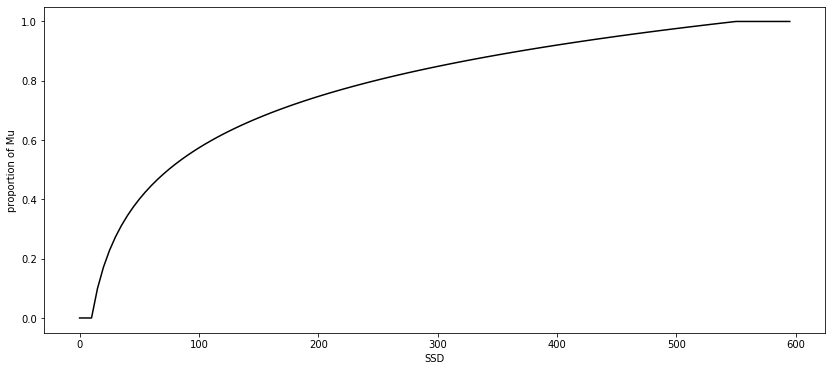

In [12]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='proportion of Mu', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'proportion of Mu']))
plt.savefig('figures/graded_mu_go_function.png', dpi=600)

# Looking at SSRTs from different scales, generating models, and SSRT methods

In [13]:
full_ssrt_df = pd.DataFrame()

for SSRTscale in SSRTscales:
    ssrt_df = pd.read_csv('ssrt_metrics/expected_ssrts_SSRTscale-%d.csv' % SSRTscale, index_col = 0)
    # reformatting - was multiindex
    ssrt_df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(ssrt_df.loc['underlying distribution', :].values, ssrt_df.columns)]
    ssrt_df = ssrt_df.drop(['underlying distribution', 'NARGUID'])

    for col in ssrt_df.columns:
        ssrt_df[col] = ssrt_df[col].astype(float)
        
    ssrt_means = ssrt_df.filter(regex='SSRT-standard|tracking|fixed').mean().to_frame(name='mean SSRT')
    ssrt_means['SSRTscale'] = SSRTscale
    ssrt_means['Generating Model'] = np.nan
    ssrt_means['SSRT Method'] = np.nan
    # ssrt_means[['Generating Model', 'SSRT Method']] = np.nan, np.nan
    ssrt_means[['Generating Model', 'SSRT Method']] = ssrt_means.reset_index()['index'].str.split('_SSRT-', expand=True).values
    ssrt_means['Generating Model'] = ssrt_means['Generating Model'].map(gen_map)
    ssrt_means['SSRT Method'] = ssrt_means['SSRT Method'].apply(lambda x: SSRT_method_map[x.split('.')[0]])
    
    ssrt_means = ssrt_means.reset_index(drop=True)
    full_ssrt_df = pd.concat([full_ssrt_df, ssrt_means], 0)
    full_ssrt_df['mean SSRT'] = full_ssrt_df['mean SSRT'].round(2)

column_order = ['Generating Model', 'SSRT Method', 'SSRTscale', 'mean SSRT']
full_ssrt_df = full_ssrt_df.sort_values(by=column_order[:-1], ascending=[False, True, False])
full_ssrt_df = full_ssrt_df[column_order]

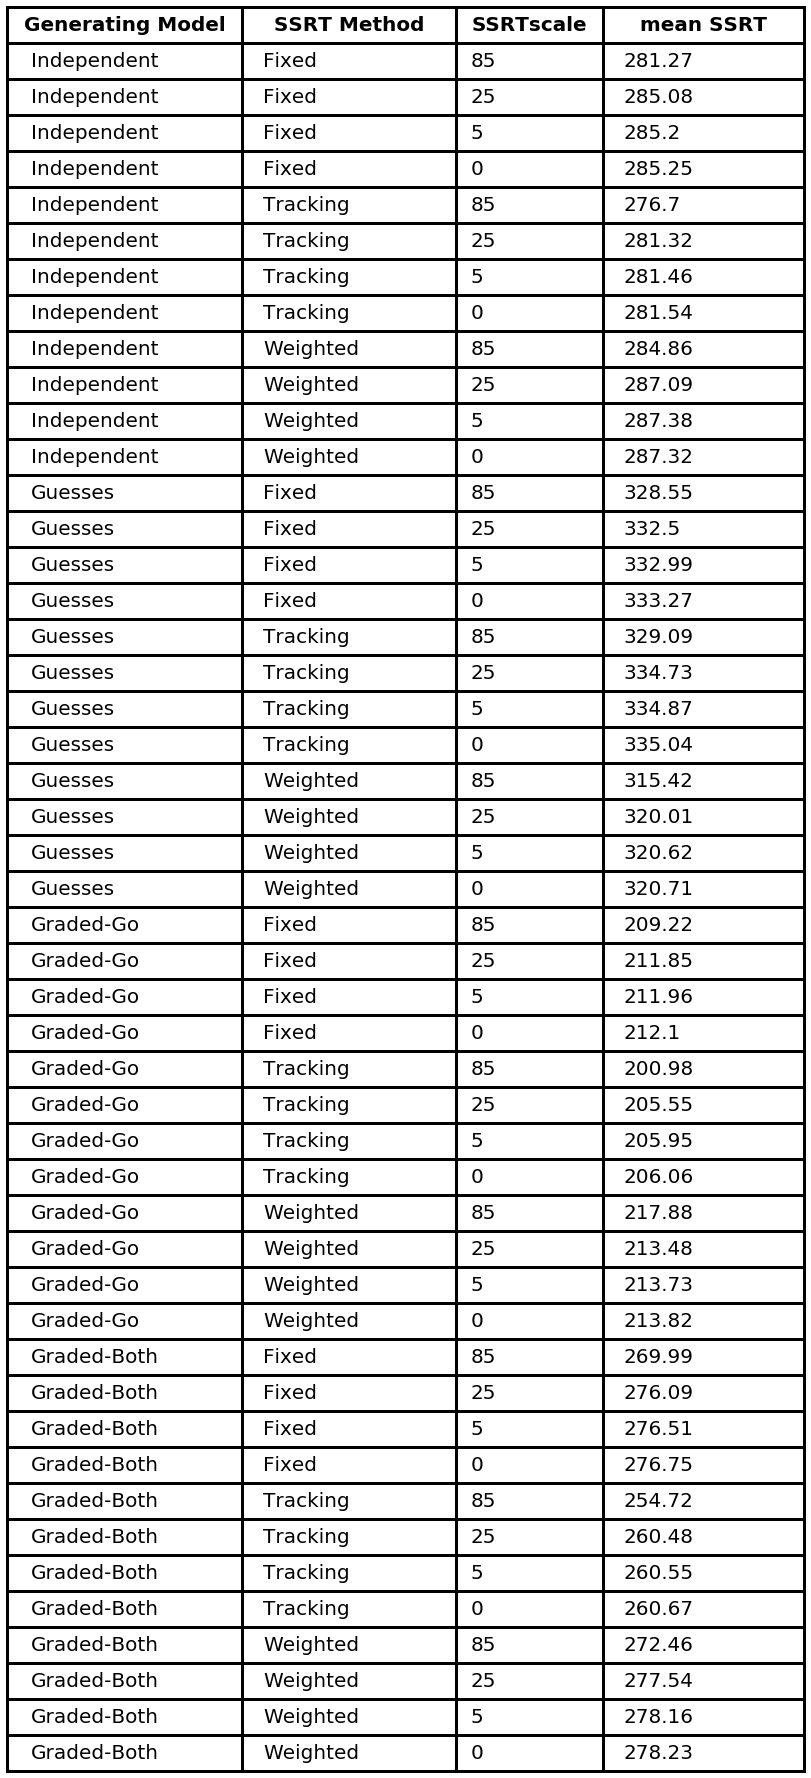

In [14]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table = ax.table(full_ssrt_df.values, colLabels=full_ssrt_df.columns,
                 loc='center', cellLoc='left',
                 colWidths = [0.35, 0.32, 0.22, 0.30], fontsize=18)


for (row, col), cell in table.get_celld().items():
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))

table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(2, 3)

for key, cell in table.get_celld().items():
    cell.set_linewidth(3)

# plt.savefig('Figures/Full_sim_SSRT_table.png', bbox_inches='tight', transparent=True)